🧠 Building our first AI brain from scratch!
🎓 Welcome to Perceptron University!
Today we're building AI from scratch to classify fruits!

📊 Our fruit dataset:
   length_cm  weight_g  yellow_score  label
0       12.5       180          0.10      0
1       13.2       175          0.15      0
2       11.8       165          0.20      0
3       14.1       190          0.05      0
4       10.9       155          0.25      0

Dataset shape: (14, 4)
Apples (0): 6 samples
Bananas (1): 8 samples

Feature matrix X shape: (14, 3)
Label vector y shape: (14,)

🚀 TRAINING OUR PERCEPTRON
🎯 Starting training with learning rate: 0.1
Initial random weights: [-0.04503477  0.13604389 -0.02933098]
Initial bias: 0.0

Training progress:
------------------------------------------------------------
Epoch   0 | Loss: 9.9561 | Accuracy: 0.5714
🎉 Reached target loss 0.05 at epoch 78!

✅ Training completed!
Final weights: [29.03464986 -3.25967578  1.60485338]
Final bias: 0.5915
Final loss: 0.0000
Final accuracy: 1

C:\Users\Amol Barkale\AppData\Local\Temp\ipykernel_10432\1898200756.py:221: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Amol Barkale\AppData\Local\Temp\ipykernel_10432\1898200756.py:221: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Amol Barkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amol Barkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


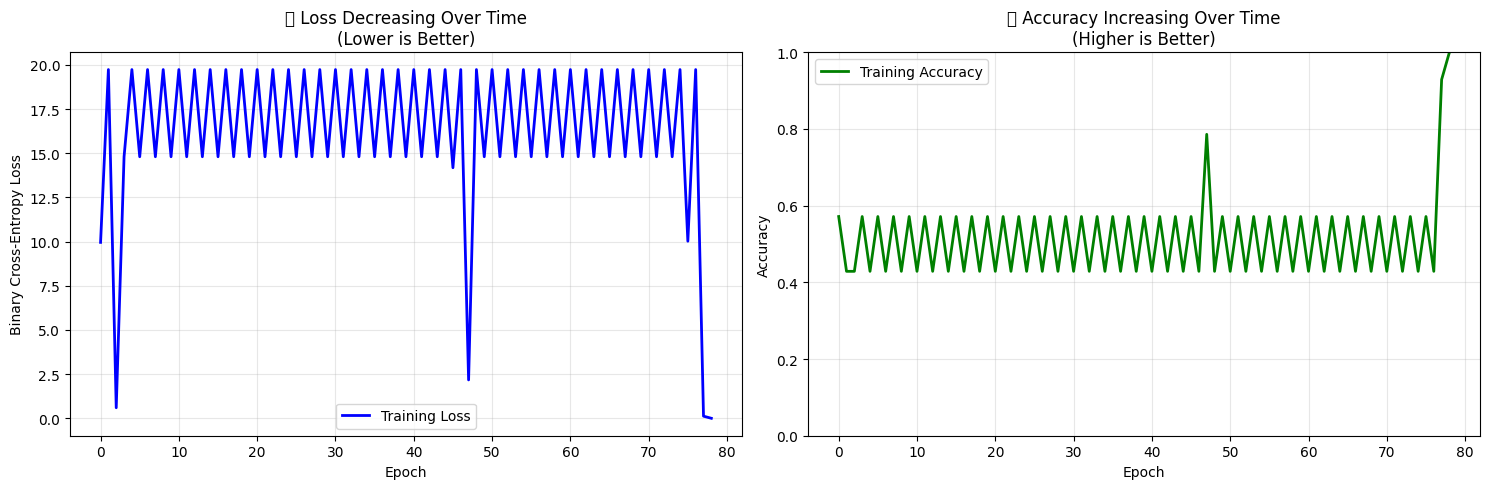

📊 What these plots tell us:
• Loss curve: Shows how our model's mistakes decrease over time
• Accuracy curve: Shows how our model gets better at correct predictions
• Smooth curves = stable learning
• Sharp drops = major breakthroughs in learning

🧪 TESTING OUR TRAINED PERCEPTRON
Sample predictions:
----------------------------------------------------------------------
Length | Weight | Yellow | True Label | Probability | Prediction
----------------------------------------------------------------------
  12.5 |  180.0 |   0.10 | Apple    |       0.000 | Apple    🍎 ✅
  13.2 |  175.0 |   0.15 | Apple    |       0.000 | Apple    🍎 ✅
  11.8 |  165.0 |   0.20 | Apple    |       0.000 | Apple    🍎 ✅
  14.1 |  190.0 |   0.05 | Apple    |       0.000 | Apple    🍎 ✅
  10.9 |  155.0 |   0.25 | Apple    |       0.000 | Apple    🍎 ✅
  13.8 |  185.0 |   0.10 | Apple    |       0.000 | Apple    🍎 ✅
  22.3 |  125.0 |   0.85 | Banana   |       1.000 | Banana   🍌 ✅
  21.7 |  118.0 |   0.90 | Banana   |

In [1]:
# ================================
# PERCEPTRON FROM SCRATCH
# Single-Neuron Logistic Model
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("🧠 Building our first AI brain from scratch!")
print("=" * 50)

# ================================
# STEP 1: LOAD AND EXPLORE DATA
# ================================

def load_and_explore_data():
    """Load fruit data and understand what we're working with"""
    
    # Load the data
    data = pd.read_csv('fruit.csv')
    print("📊 Our fruit dataset:")
    print(data.head())
    print(f"\nDataset shape: {data.shape}")
    print(f"Apples (0): {sum(data['label'] == 0)} samples")
    print(f"Bananas (1): {sum(data['label'] == 1)} samples")
    
    # Prepare features and labels
    X = data[['length_cm', 'weight_g', 'yellow_score']].values
    y = data['label'].values
    
    print(f"\nFeature matrix X shape: {X.shape}")
    print(f"Label vector y shape: {y.shape}")
    
    return X, y

# ================================
# STEP 2: THE PERCEPTRON CLASS
# ================================

class SimplePerceptron:
    """
    A single-neuron logistic classifier built from scratch
    
    Think of this as a simple decision-making brain cell:
    
    - Takes 3 inputs (length, weight, yellowness)
    - Learns optimal weights for each feature
    - Outputs probability of being a banana
    """
    
    def __init__(self, learning_rate=0.01, max_epochs=500, target_loss=0.05):
        self.learning_rate = learning_rate  # How big steps to take when learning
        self.max_epochs = max_epochs        # Maximum training rounds
        self.target_loss = target_loss      # Stop early if we reach this accuracy
        
        # These will store our learning journey
        self.loss_history = []
        self.accuracy_history = []
        
    def sigmoid(self, z):
        """
        The sigmoid activation function - converts any number to 0-1 range
        
        Why sigmoid? It's like a soft switch:
        - Large positive z → output close to 1 (confident banana)
        - Large negative z → output close to 0 (confident apple)  
        - z near 0 → output around 0.5 (uncertain)
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def forward_pass(self, X):
        """
        Forward pass: make predictions
        
        This is like the perceptron "thinking":
        1. Take weighted sum of inputs (z = X * weights + bias)
        2. Apply sigmoid to get probability
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return predictions
    
    def compute_loss(self, y_true, y_pred):
        """
        Binary cross-entropy loss - measures how wrong our predictions are
        
        Lower loss = better predictions
        Perfect predictions would give loss = 0
        """
        # Prevent log(0) by clipping predictions
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def compute_accuracy(self, y_true, y_pred):
        """Convert probabilities to binary predictions and calculate accuracy"""
        binary_pred = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(y_true == binary_pred)
        return accuracy
    
    def fit(self, X, y):
        """
        Train the perceptron using gradient descent
        
        This is where the magic happens - the perceptron learns!
        Like a DJ adjusting knobs based on crowd reaction:
        - If prediction wrong → adjust weights in opposite direction
        - If prediction right → small adjustment to fine-tune
        """
        
        # Initialize weights randomly (small values)
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.1, n_features)
        self.bias = 0.0
        
        print(f"🎯 Starting training with learning rate: {self.learning_rate}")
        print(f"Initial random weights: {self.weights}")
        print(f"Initial bias: {self.bias}")
        print("\nTraining progress:")
        print("-" * 60)
        
        for epoch in range(self.max_epochs):
            # Forward pass - make predictions
            y_pred = self.forward_pass(X)
            
            # Calculate loss and accuracy
            loss = self.compute_loss(y, y_pred)
            accuracy = self.compute_accuracy(y, y_pred)
            
            # Store metrics for plotting
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            
            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch:3d} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")
            
            # Early stopping if we reach target loss
            if loss < self.target_loss:
                print(f"🎉 Reached target loss {self.target_loss} at epoch {epoch}!")
                break
            
            # GRADIENT DESCENT - The learning step!
            # Calculate gradients (how much to change each weight)
            m = X.shape[0]  # number of samples
            
            # Gradient of loss with respect to weights
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            # Gradient of loss with respect to bias  
            db = (1/m) * np.sum(y_pred - y)
            
            # Update weights and bias (move in opposite direction of gradient)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        print(f"\n✅ Training completed!")
        print(f"Final weights: {self.weights}")
        print(f"Final bias: {self.bias:.4f}")
        print(f"Final loss: {self.loss_history[-1]:.4f}")
        print(f"Final accuracy: {self.accuracy_history[-1]:.4f}")
    
    def predict_proba(self, X):
        """Get prediction probabilities"""
        return self.forward_pass(X)
    
    def predict(self, X):
        """Get binary predictions (0 or 1)"""
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

# ================================
# STEP 3: TRAINING AND EVALUATION
# ================================

def train_and_evaluate():
    """Train our perceptron and see how it learns!"""
    
    # Load data
    X, y = load_and_explore_data()
    
    # Create and train perceptron
    print("\n" + "="*50)
    print("🚀 TRAINING OUR PERCEPTRON")
    print("="*50)
    
    perceptron = SimplePerceptron(learning_rate=0.1, max_epochs=1000, target_loss=0.05)
    perceptron.fit(X, y)
    
    return perceptron, X, y

# ================================
# STEP 4: VISUALIZATION
# ================================

def plot_training_progress(perceptron):
    """Plot how our perceptron learned over time"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss over epochs
    ax1.plot(perceptron.loss_history, 'b-', linewidth=2, label='Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross-Entropy Loss')
    ax1.set_title('🔽 Loss Decreasing Over Time\n(Lower is Better)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot accuracy over epochs  
    ax2.plot(perceptron.accuracy_history, 'g-', linewidth=2, label='Training Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('📈 Accuracy Increasing Over Time\n(Higher is Better)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 What these plots tell us:")
    print("• Loss curve: Shows how our model's mistakes decrease over time")
    print("• Accuracy curve: Shows how our model gets better at correct predictions")
    print("• Smooth curves = stable learning")
    print("• Sharp drops = major breakthroughs in learning")

# ================================
# STEP 5: TEST WITH NEW EXAMPLES
# ================================

def test_predictions(perceptron, X, y):
    """Test our trained perceptron on examples"""
    
    print("\n" + "="*50)
    print("🧪 TESTING OUR TRAINED PERCEPTRON")
    print("="*50)
    
    # Get predictions on training data
    probabilities = perceptron.predict_proba(X)
    predictions = perceptron.predict(X)
    
    print("Sample predictions:")
    print("-" * 70)
    print("Length | Weight | Yellow | True Label | Probability | Prediction")
    print("-" * 70)
    
    for i in range(len(X)):
        length, weight, yellow = X[i]
        true_label = "Apple" if y[i] == 0 else "Banana"
        pred_label = "Apple" if predictions[i] == 0 else "Banana"
        prob = probabilities[i]
        
        # Add emoji for visual appeal
        emoji = "🍎" if predictions[i] == 0 else "🍌"
        correct = "✅" if predictions[i] == y[i] else "❌"
        
        print(f"{length:6.1f} | {weight:6.1f} | {yellow:6.2f} | {true_label:8s} | {prob:11.3f} | {pred_label:8s} {emoji} {correct}")
    
    # Test with completely new examples
    print(f"\n🔮 Let's test with some new fruits:")
    print("-" * 50)
    
    new_fruits = np.array([
        [15.0, 170, 0.1],   # Should be apple (short, heavy, not yellow)
        [25.0, 120, 0.9],   # Should be banana (long, light, very yellow)
        [18.0, 140, 0.5],   # Borderline case - let's see!
    ])
    
    new_probs = perceptron.predict_proba(new_fruits)
    new_preds = perceptron.predict(new_fruits)
    
    descriptions = ["Short & heavy, barely yellow", "Long & light, very yellow", "Medium everything"]
    
    for i, (fruit, desc) in enumerate(zip(new_fruits, descriptions)):
        length, weight, yellow = fruit
        prob = new_probs[i]
        pred = "Apple 🍎" if new_preds[i] == 0 else "Banana 🍌"
        confidence = max(prob, 1-prob)
        
        print(f"Fruit {i+1}: [{length:.1f}cm, {weight:.1f}g, {yellow:.1f} yellow]")
        print(f"  Description: {desc}")
        print(f"  Prediction: {pred} (confidence: {confidence:.1%})")
        print()

# ================================
# STEP 6: UNDERSTAND THE WEIGHTS
# ================================

def interpret_learned_weights(perceptron):
    """Understand what our perceptron learned"""
    
    print("\n" + "="*50)
    print("🧠 WHAT DID OUR PERCEPTRON LEARN?")
    print("="*50)
    
    feature_names = ['Length (cm)', 'Weight (g)', 'Yellow Score']
    weights = perceptron.weights
    bias = perceptron.bias
    
    print("Final learned parameters:")
    print("-" * 30)
    for feature, weight in zip(feature_names, weights):
        direction = "↗️ Increases" if weight > 0 else "↘️ Decreases"
        strength = "Strong" if abs(weight) > 1 else "Moderate" if abs(weight) > 0.1 else "Weak"
        print(f"{feature:15s}: {weight:8.3f} ({strength} {direction} banana probability)")
    
    print(f"Bias:              {bias:8.3f} (Base tendency)")
    
    print(f"\n🔍 Interpretation:")
    if weights[0] > 0:
        print("• Longer fruits are more likely to be bananas ✅")
    else:
        print("• Shorter fruits are more likely to be bananas")
        
    if weights[1] < 0:
        print("• Lighter fruits are more likely to be bananas ✅") 
    else:
        print("• Heavier fruits are more likely to be bananas")
        
    if weights[2] > 0:
        print("• More yellow fruits are more likely to be bananas ✅")
    else:
        print("• Less yellow fruits are more likely to be bananas")

# ================================
# MAIN EXECUTION
# ================================

if __name__ == "__main__":
    print("🎓 Welcome to Perceptron University!")
    print("Today we're building AI from scratch to classify fruits!")
    print("\n" + "="*60)
    
    # Train the model
    perceptron, X, y = train_and_evaluate()
    
    # Visualize learning progress
    plot_training_progress(perceptron)
    
    # Test predictions
    test_predictions(perceptron, X, y)
    
    # Interpret what was learned
    interpret_learned_weights(perceptron)
    
    print("\n" + "="*60)
    print("🎉 Congratulations! You just built your first AI from scratch!")
    print("You now understand exactly how neural networks learn!")
    print("="*60)